# Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [2]:
logins = pd.read_json(r'~\Desktop\ultimate_challenge\logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
logins['time'] = logins.login_time.dt.time
intervals = logins.set_index('login_time').rename(columns = {'time': 'counted'})
intervals = intervals.resample('15Min').count()
intervals.tail()

,counted
login_time,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


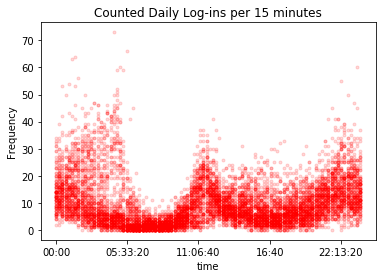

In [5]:
plt.plot(intervals.index.time, intervals.counted, 'r.', alpha = 0.15);
plt.ylabel('Frequency')
plt.title('Counted Daily Log-ins per 15 minutes');
# plot suggests there is a spike in activity around noon and an increase in activity at night. 
# The least amount of logins occur in the morning

In [6]:
# measures of centreal tendencies
intervals.describe()

,counted
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


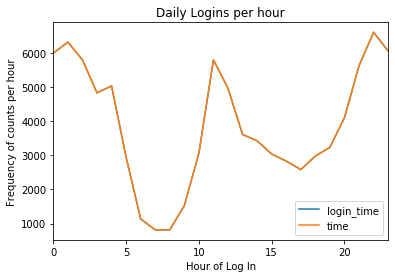

In [7]:
# count of login per hour
logins.groupby(logins.login_time.dt.hour).count().plot()
plt.ylabel('Frequency of counts per hour')
plt.xlabel('Hour of Log In')
plt.title('Daily Logins per hour');

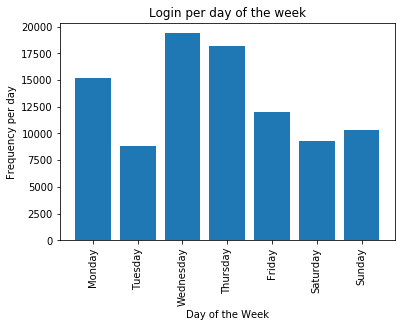

In [8]:
# count of login per day 
dow = logins.groupby(logins['login_time'].dt.strftime('%A')).count()
dow_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(sorted(dow.index, key = dow_key.index), dow.time)
plt.xticks(rotation = 90)
plt.ylabel('Frequency per day')
plt.xlabel('Day of the Week')
plt.title('Login per day of the week');
# Wed and Thurs are two days with the highest frequency while Sat and Tues have the lowest frequency of logins 

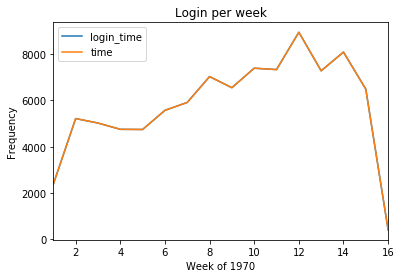

In [9]:
# count of login per week
logins.groupby(logins.login_time.dt.week).count().plot();
plt.xlabel('Week of 1970')
plt.ylabel('Frequency')
plt.title('Login per week');
# there was a steady increase each week until week twelve where there was a sharp decrease
# followed by an even larger decrease

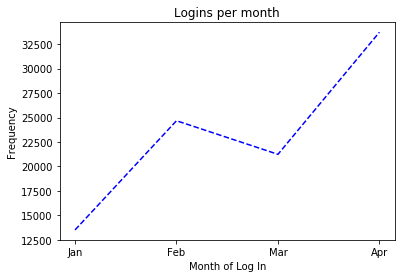

In [10]:
# count of login per day in each month
month_key = ['Jan', 'Feb', 'Mar', 'Apr']
month = logins.groupby(logins.login_time.dt.strftime('%b')).count()
plt.plot(sorted(month.index, key = month_key.index), month.time, 'b--')
plt.ylabel('Frequency')
plt.xlabel('Month of Log In')
plt.title('Logins per month');
# shows that the login rate increased each month with a slight drop in February 

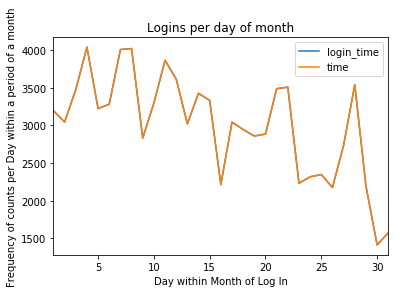

In [11]:
# count of login per day in each month
logins.groupby(logins.login_time.dt.day).count().plot()
plt.ylabel('Frequency of counts per Day within a period of a month')
plt.xlabel('Day within Month of Log In')
plt.title('Logins per day of month');
# It seems like there were more users logging in during the the megining of the month and as the month would continue user 
# activity would decrease

In [12]:
del logins, intervals, month, month_key, dow, dow_key

# Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.<br>
1. What would you choose as the key measure of success of this experiment in <br>
encouraging driver partners to serve both cities, and why would you choose this metric?<br>
2. Describe a practical experiment you would design to compare the effectiveness of the<br>
proposed change in relation to the key measure of success. Please provide details on:<br>
a. how you will implement the experiment<br>
b. what statistical test(s) you will conduct to verify the significance of the<br>
observation<br>
c. how you would interpret the results and provide recommendations to the city<br>
operations team along with any caveats.<br>


1. There are two key metrics that I think would be important. The first metric deals with the overall loss of revenue from reimbursing toll funds to driver-partners. Perhaps this is a long term metric though and can be periodically assessed in time. Secondly, and the most important metric to use in this case, is the duration of time it takes for a rider to get picked up. Ultimately the goal is to increase availability of drivers; to measure this the key metric to be analyzed is the mean wait time of a rider.

2. A practical experiment to be conducted to assess the measure of the effectiveness for adjusting the toll costs would be to first analyze a sample population's mean wait time before the toll cost adjustment and compare it to the mean wait time after the toll cost adjustment. A proper sample size can be determined using a basic statistical formula and can be increased or decreased in size by adjusting the confidence level and. or the margin of error. Very large sample sizes will allow for better precision due to the amount of data but, unless the size of the sample is too large to manage a threshold should be obtained for a maximum sample size. A statistical test that could be conducted would be a comparison of means. A hypothesis of their being no change in mean wait times after a toll adjustment can be rejected or failed to be rejected following the experiment. The paired t-test can be used and a significance level of the standard 5% can be set for the parameters of the experiment. You would then find the mean wait time before the change in toll costs and then find the mean wait time after the costs have been implemented. To reject the null hypothesis, concluding that there is a change between wait times, a p-value would have to be less than a significance level of 5%. If there is no change in wait time a p-value would be greater than 5% and you would have to fail to reject your null hypothesis. this would indicate that the toll cost adjustment did not have a significant effect on the availability of drivers within each city.

# Part 3 ‑ Predictive modeling

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided<br>
data for this analysis (a few sentences/plots describing your approach will suffice). What<br>
fraction of the observed users were retained?<br>
2. Build a predictive model to help Ultimate determine whether or not a user will be active<br>
in their 6th month on the system. Discuss why you chose your approach, what<br>
alternatives you considered, and any concerns you have. How valid is your model?<br>
Include any key indicators of model performance.<br>
3. Briefly discuss how Ultimate might leverage the insights gained from the model to<br>
improve its long­term rider retention (again, a few sentences will suffice).<br>


In [13]:
import json
import seaborn as sns
import gc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, f1_score, classification_report, accuracy_score, confusion_matrix
import lightgbm as lgb

gc.enable()

# import data
openfile = open('ultimate_data_challenge.json')
jsondata = json.load(openfile)
df = pd.DataFrame(jsondata)
openfile.close()

In [14]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [16]:
df.last_trip_date = pd.to_datetime(df.last_trip_date);
df.signup_date = pd.to_datetime(df.signup_date);

In [17]:
df.last_trip_date.max()
# last trip was on July 1 therefore, 30 days preceding will act as the range for deciding retention rate

Timestamp('2014-07-01 00:00:00')

In [18]:
# the number of months a user has been signed up with Ultimate, used to identify members in their 5 month
df['nb_months'] = ((df.last_trip_date.dt.month - df.signup_date.dt.month))

In [19]:
def retention_factor(date1):
    """if the user has not purchased a ride within the
    last 30 days from July 1 then retention rule of 30 days implies non-retention"""
    if date1.month >= 6:
        return 1
    else: 
        return 0 

In [20]:
df['unchurned'] = df['last_trip_date'].apply(retention_factor)

# EDA

C:\Users\KETT\Anaconda3\envs\ML_gbms\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\KETT\Anaconda3\envs\ML_gbms\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


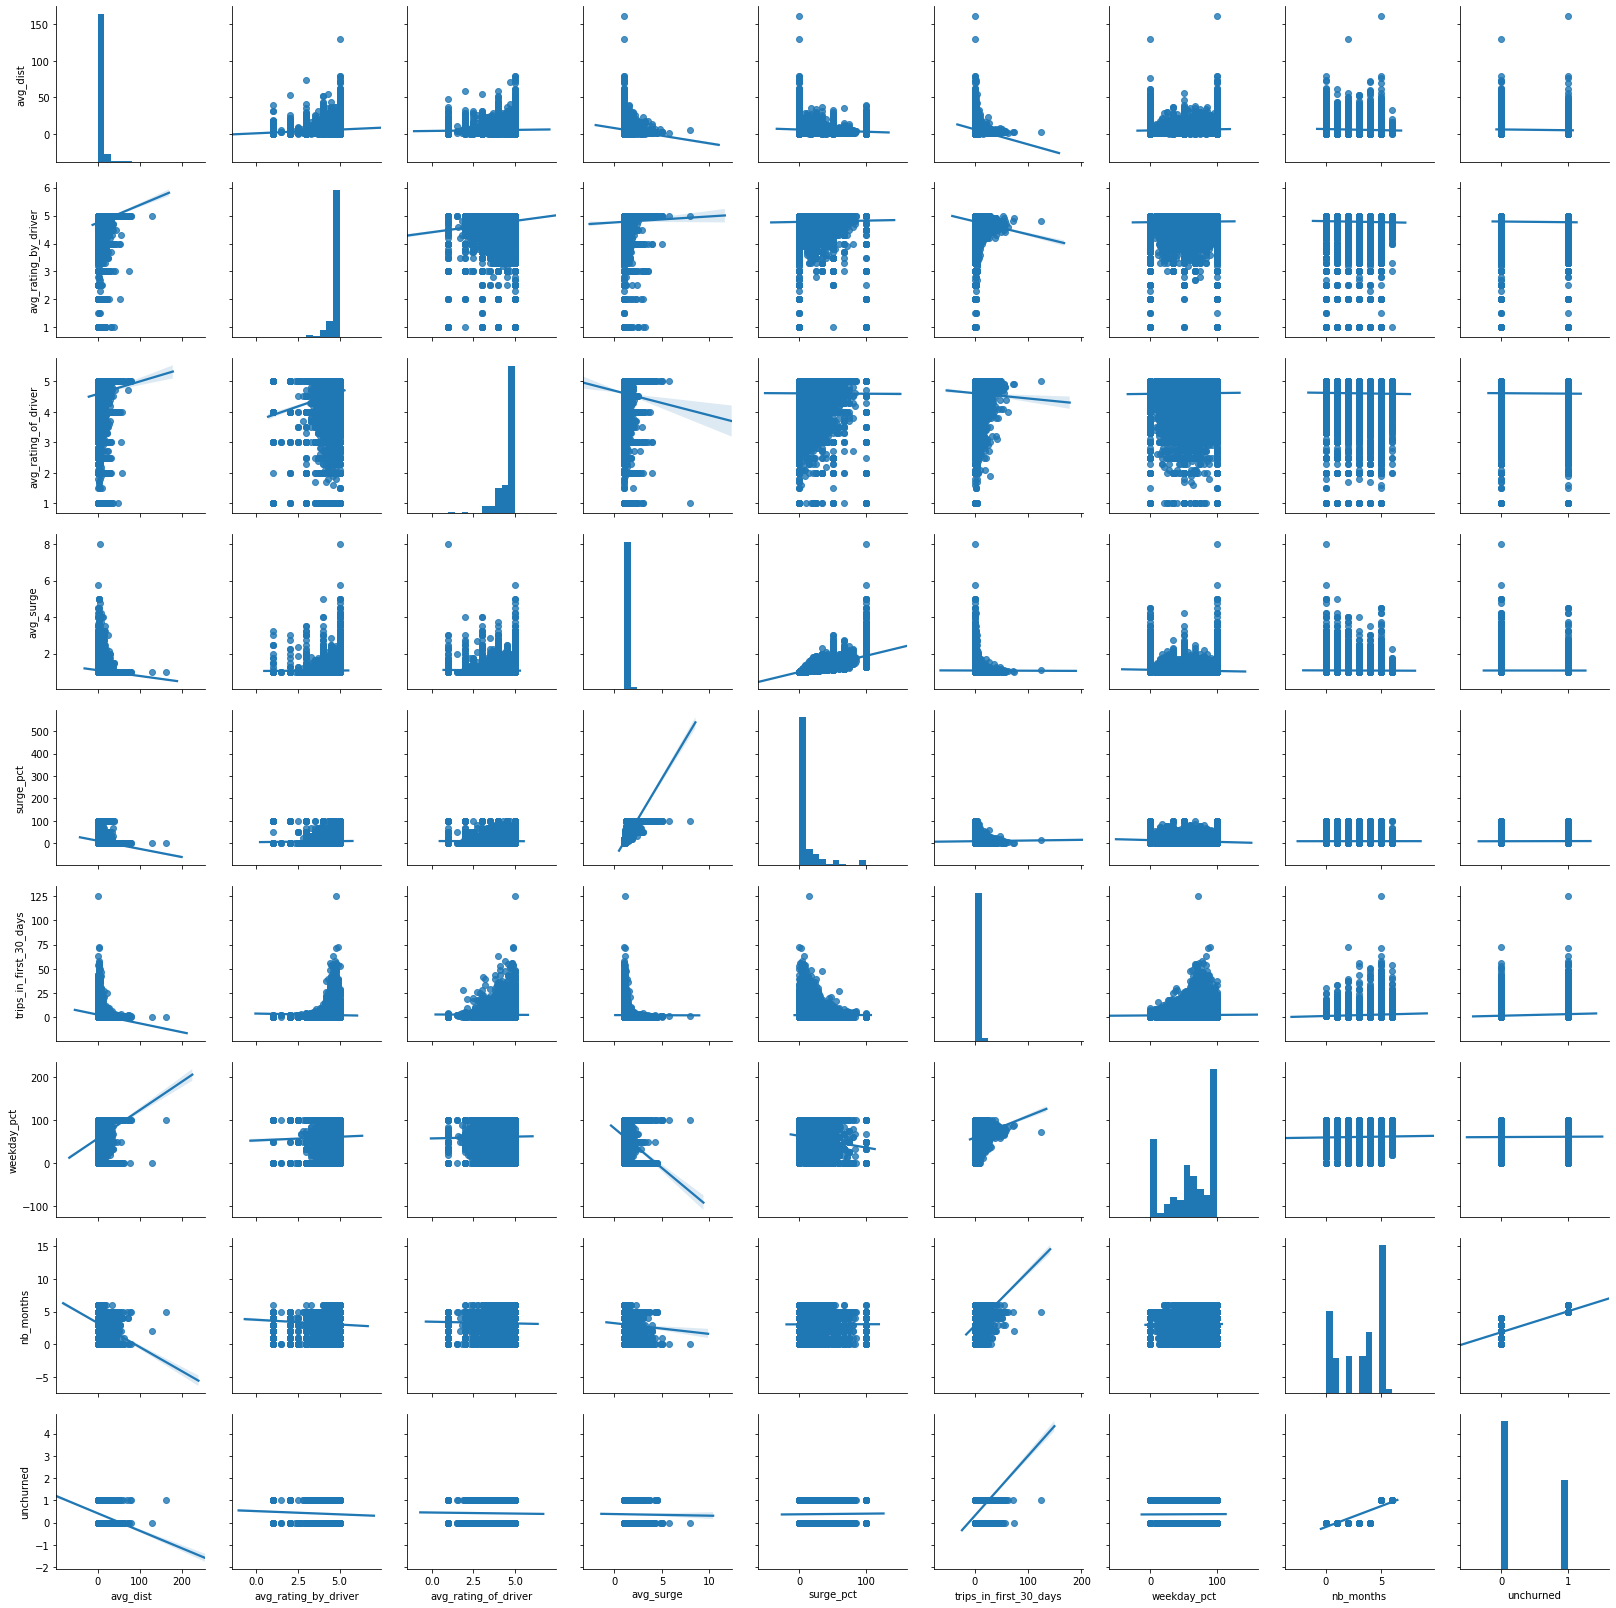

In [21]:
# pair plot to 
sns.pairplot(df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'nb_months', 'unchurned']], kind="reg");
# plot shows no significant correlation among features except with surge percentage and avg surge and of course last trip and unchurned

In [22]:
df.unchurned.value_counts()

0    31196
1    18804
Name: unchurned, dtype: int64

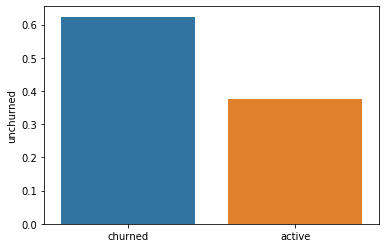

In [23]:
# check the balance of the target variable
sns.barplot(['churned', 'active'], df.unchurned.value_counts(normalize = True))
# there is about 40% of users still active

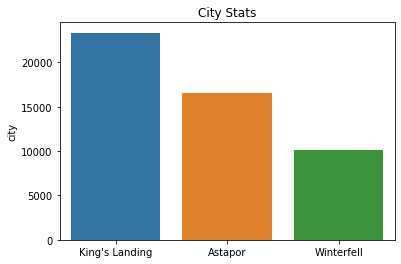

In [24]:
sns.barplot(df.city.unique(), df.city.value_counts())
plt.title('City Stats');

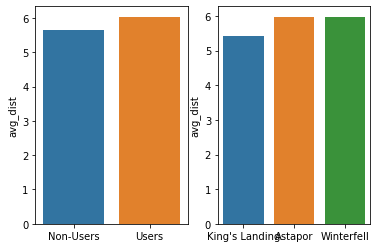

In [25]:
fig, ax = plt.subplots(1,2);
sns.barplot(df.city.unique(), df.groupby('city').avg_dist.mean(), ax = ax[1])
sns.barplot(['Non-Users', 'Users'], df.groupby('ultimate_black_user').avg_dist.mean(), ax = ax[0])
# mean distance is about the same for both types of users and also for cities
# this will allow us to impute the avg_distance equal to 0

In [26]:
# checking for null values
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
nb_months                    0
unchurned                    0
dtype: int64

In [27]:
# checking for duplicates within the df
df.duplicated().sum()

8

In [28]:
# checking why observations are indicating duplicates
df.loc[df.duplicated() == True]
# no indication of actual duplicates within df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,nb_months,unchurned
2608,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0,0,0
18057,Astapor,1,2014-01-11,5.0,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0,0,0
29601,Winterfell,1,2014-01-01,NaN,1.0,2014-01-02,Android,0.0,False,100.0,8.08,5.0,0,0
34641,Winterfell,1,2014-01-18,NaN,1.0,2014-01-19,iPhone,0.0,True,0.0,1.44,5.0,0,0
36627,Winterfell,1,2014-01-18,5.0,1.0,2014-01-19,Android,0.0,False,0.0,3.54,5.0,0,0
39601,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.00,5.0,0,0
42025,Winterfell,1,2014-01-18,NaN,1.0,2014-01-19,Android,0.0,False,0.0,0.01,5.0,0,0
45416,Astapor,1,2014-01-20,5.0,1.0,2014-01-20,iPhone,0.0,False,100.0,3.06,5.0,0,0


In [29]:
# 73 avg_distances are equal to zero, further analysis will determine if imputing or eleimination should be done 
df.loc[df['avg_dist'] == 0.00]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,nb_months,unchurned
72,Astapor,1,2014-01-07,5.0,1.0,2014-01-08,iPhone,0.0,False,100.0,0.0,3.0,0,0
116,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.0,5.0,0,0
188,Winterfell,1,2014-01-11,NaN,1.0,2014-01-14,Android,0.0,False,100.0,0.0,5.0,0,0
356,Winterfell,1,2014-01-15,4.0,1.0,2014-01-16,Android,0.0,False,100.0,0.0,5.0,0,0
479,Winterfell,1,2014-01-24,5.0,1.0,2014-01-25,iPhone,0.0,False,0.0,0.0,5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47929,Winterfell,0,2014-01-07,4.0,1.0,2014-03-14,iPhone,0.0,False,100.0,0.0,5.0,2,0
48283,Winterfell,0,2014-01-18,NaN,1.0,2014-03-08,Android,0.0,False,0.0,0.0,5.0,2,0
49464,Astapor,0,2014-01-03,5.0,1.0,2014-04-28,iPhone,0.0,False,100.0,0.0,5.0,3,0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.0,5.0,0,0


In [30]:
# dropping null values from avg_rating_of driver eliminates all null values within the df. Null values consisted of only 6% 
# of the data and can therefore be removed without much loss from losing data 94% still remain/ 10% common threshold
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 14 columns):
city                      41445 non-null object
trips_in_first_30_days    41445 non-null int64
signup_date               41445 non-null datetime64[ns]
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
surge_pct                 41445 non-null float64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
nb_months                 41445 non-null int64
unchurned                 41445 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(3), object(2)
memory usage: 4.5+ MB


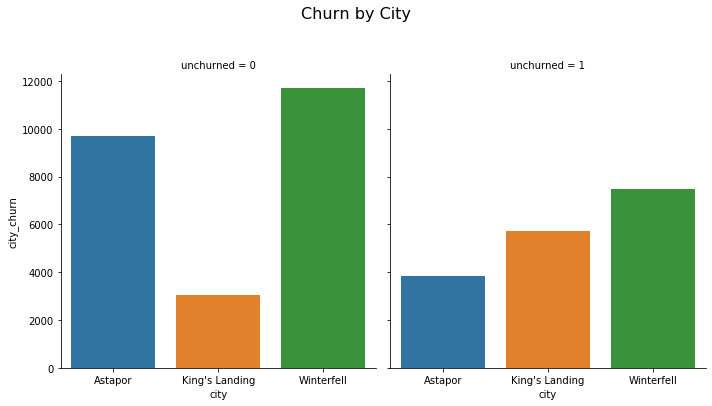

In [31]:
# Does city effect churn rates?
city_churn = df.groupby('city').unchurned.value_counts().to_frame('city_churn').reset_index()
sns.catplot('city', 'city_churn', col = 'unchurned',  kind="bar", data = city_churn );
plt.suptitle('Churn by City', size=16, y=1.12);    
#King's Landing has a smaller churn than other cities, Astopor has the highest churn

In [32]:
def hist_active_vs_churn(df, col_name):
    """creates histogram for each set of churned users for specific column"""
    is_active = df['unchurned'] == 1
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].hist(df[is_active][col_name].values)
    axes[0].set_title("active users")
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel("counts")
    axes[1].hist(df[~is_active][col_name].values)
    axes[1].set_title("churned users")
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel("counts")
    fig.tight_layout()
    plt.show()

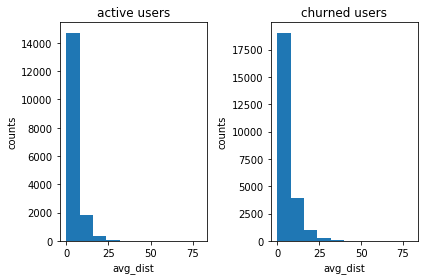

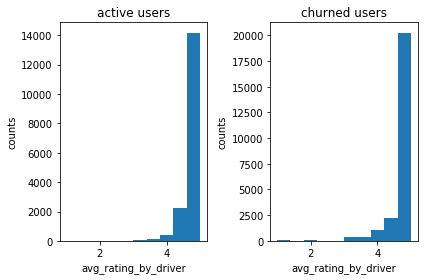

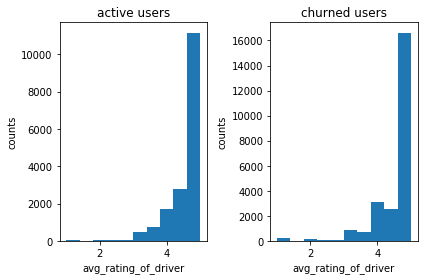

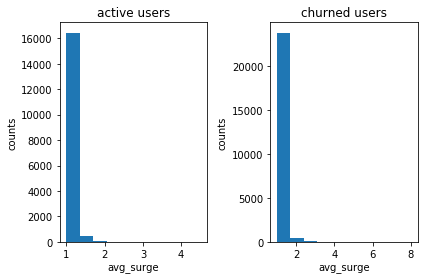

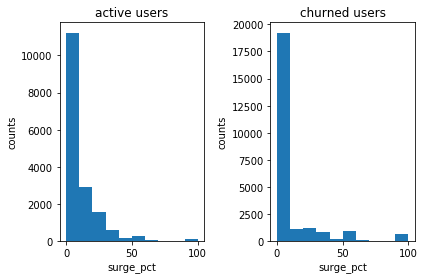

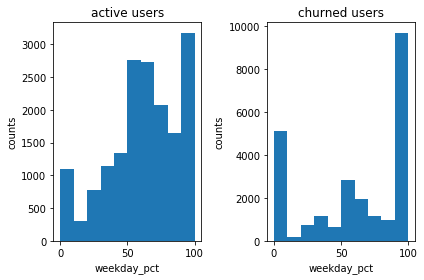

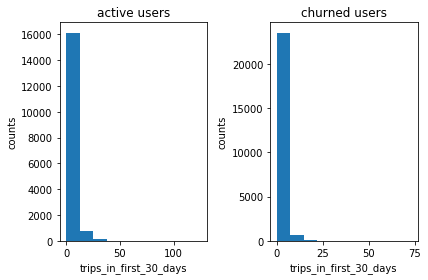

In [33]:
cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'trips_in_first_30_days']
for col in cols:
    hist_active_vs_churn(df, col_name=col)
# distance - 
# rating by driver- some higher rate for active users
# rating of driver- some values higher for active users
# avg surge - often active users do not have a high surge avg
# surge pct - higher for active users; understandable considering the more frequent rides 
# weekday pct - same as last feature
# this information indicates that most of the active users are continuous during the week and often times use the services 
# during busy times. this could indicate that people who are working are more likely to use and remain active with Ultimate

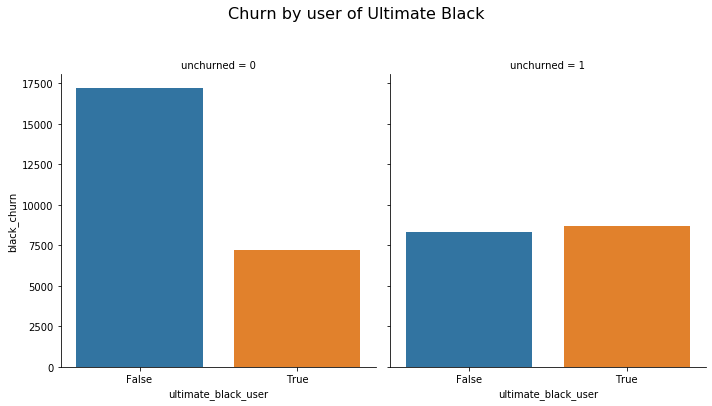

In [34]:
# Are Ultimate Black users retained more often?
black_churn = df.groupby('ultimate_black_user').unchurned.value_counts().to_frame('black_churn').reset_index()
sns.catplot('ultimate_black_user', 'black_churn', col = 'unchurned',  kind="bar", data = black_churn );
plt.suptitle('Churn by user of Ultimate Black', size=16, y=1.12);  
# Many churned users are not a part of Ultimate Black

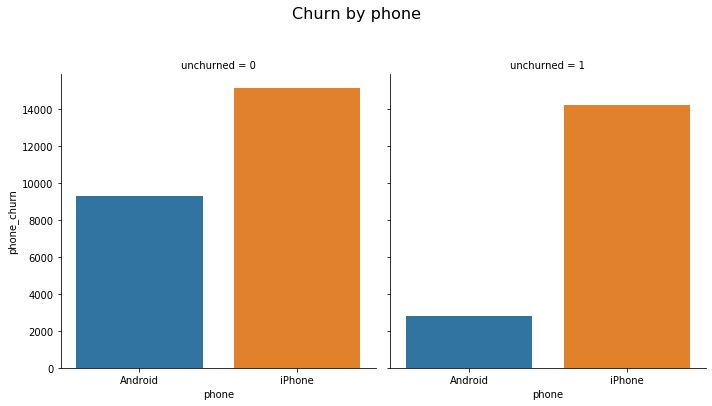

In [35]:
# Are Apple users retained more often?
phone_churn = df.groupby('phone').unchurned.value_counts().to_frame('phone_churn').reset_index()
sns.catplot('phone', 'phone_churn', col = 'unchurned',  kind="bar", data = phone_churn );
plt.suptitle('Churn by phone', size=16, y=1.12); 
# Most people with an Iphone are still active, while there are few who have an android

In [37]:
del black_churn, city_churn, col, cols, hist_active_vs_churn, phone_churn, retention_factor
gc.collect()

15381

# Preprocessing

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 14 columns):
city                      41445 non-null object
trips_in_first_30_days    41445 non-null int64
signup_date               41445 non-null datetime64[ns]
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
surge_pct                 41445 non-null float64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
nb_months                 41445 non-null int64
unchurned                 41445 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(3), object(2)
memory usage: 4.5+ MB


In [39]:
# impute the 0.00 value of distance with median of the column
df.avg_dist.replace(0.00, df.avg_dist.median(), inplace = True)

In [40]:
# Change the True, False to 0 and 1
df.ultimate_black_user = df.ultimate_black_user.astype('int64')

In [41]:
df.phone = df.phone.astype('category')
df.city = df.city.astype('category')

In [42]:
# There are no null values and columns not being used will be dropped
df.drop(['last_trip_date', 'signup_date', 'nb_months'], axis = 1, inplace = True)

In [43]:
# These will be used as the base for X and y variables throughout the notebook
X, y = df.drop('unchurned', axis=1), df.unchurned

In [44]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0,4], random_state=13)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
smote_X = pd.DataFrame(X_resampled, columns = X.columns )
smote_y= pd.DataFrame(y_resampled, columns=['unchurned'])
# Check the numbers of our data
print("length is",len(smote_X))
print("Number of churned",len(smote_y[smote_y['unchurned'] == 0]))
print("Number of active",len(smote_y[smote_y['unchurned'] == 1]))
print("Proportion of churned ", len(smote_y[smote_y['unchurned'] == 0]) / len(smote_X))
print("Proportion of active", len(smote_y[smote_y['unchurned'] == 1]) / len(smote_X))
# class is balanced with equal proportions

length is 48820
Number of churned 24410
Number of active 24410
Proportion of churned  0.5
Proportion of active 0.5


In [45]:
# convert object types back to float type for input
for col in smote_X.columns:
    if col != 'phone' and col != 'city':
        smote_X[col] = smote_X[col].astype('float64')

In [46]:
smote_X.phone = smote_X.phone.astype('category')
smote_X.city = smote_X.city.astype('category')

In [47]:
# splitting data with 20% split for test and using balanced categories of target
X_train, X_test, y_train, y_test = train_test_split(smote_X, smote_y, test_size = .20, random_state = 13)

In [48]:
# lgb accepts a certain format for the model
d_train = lgb.Dataset(X_train, 
                      label = y_train,
                      categorical_feature = ['phone', 'city'], 
                      free_raw_data=False
                     )
d_test = lgb.Dataset(X_test,
                     y_test,
                     categorical_feature = ['phone', 'city'],
                     reference = d_train
                    )

In [49]:
del df, X, y
gc.collect()

110

# Training

In [50]:
# hypertuning parameters to be used, arr indicates tuned parameters
params = {'objective' : ['binary'],
          'metric' : ['auc'],
          'max_depth': [10],
          'random_state' : [13],
          'max_depth':[200]
         }
          

In [51]:
lgbm = lgb.LGBMClassifier(
          boosting_type= 'gbdt', 
          objective = params['objective'], 
          n_jobs = -1, 
          max_depth = params['max_depth'], 
          random_state = params['random_state']               
                        )               

In [52]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8, 16, 24],
    'num_leaves': [5, 30, 60], 
    # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], 
    # for better accuracy trying dart as specified
    'objective' : ['binary'],
    'metric' : ['auc'],
    'max_bin':[255, 510], 
    # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [13],
    'colsample_bytree' : [0.70, 0.65, 0.8],
    'reg_alpha' : [1, 1.2],
    'reg_lambda' : [1, 1.2, 1.4],
    'early_stopping_rounds': [20],
    }

In [53]:
grid = GridSearchCV(lgbm, gridParams, verbose=2, cv=4, n_jobs=-1, scoring = 'f1')
# Run the grid
grid.fit(smote_X.drop(['phone', 'city'], axis = 1), smote_y, eval_metric = 'f1', eval_set=[(X_test.drop(['phone', 'city'], axis = 1), y_test)] )
# the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 1296 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed: 20.3min finished
C:\Users\KETT\Anaconda3\envs\ML_gbms\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was

[1]	valid_0's auc: 0.819727
[2]	valid_0's auc: 0.83463
[3]	valid_0's auc: 0.844264
[4]	valid_0's auc: 0.844882
[5]	valid_0's auc: 0.844259
[6]	valid_0's auc: 0.843117
[7]	valid_0's auc: 0.842295
[8]	valid_0's auc: 0.841152
[9]	valid_0's auc: 0.842938
[10]	valid_0's auc: 0.844278


C:\Users\KETT\Anaconda3\envs\ML_gbms\lib\site-packages\lightgbm\callback.py:192: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[11]	valid_0's auc: 0.843729
[12]	valid_0's auc: 0.843061
[13]	valid_0's auc: 0.84216
[14]	valid_0's auc: 0.842909
[15]	valid_0's auc: 0.843177
[16]	valid_0's auc: 0.84335
[17]	valid_0's auc: 0.84356
[18]	valid_0's auc: 0.843664
[19]	valid_0's auc: 0.843469
[20]	valid_0's auc: 0.842975
[21]	valid_0's auc: 0.842706
[22]	valid_0's auc: 0.843244
[23]	valid_0's auc: 0.843499
[24]	valid_0's auc: 0.843283
{'boosting_type': 'dart', 'colsample_bytree': 0.65, 'early_stopping_rounds': 20, 'learning_rate': 0.01, 'max_bin': 510, 'metric': 'auc', 'n_estimators': 24, 'num_leaves': 60, 'objective': 'binary', 'random_state': 13, 'reg_alpha': 1.2, 'reg_lambda': 1.4}
0.7345587225330662


In [54]:
# parameters from gridsearch used to create a tuned model of lgbm
params['learning_rate'] = 0.01
params['n_estimators'] = 24
params['num_leaves'] = 60
params['boosting_type'] = 'dart'
params['max_bin'] = 510
params['colsample_bytree'] = 0.65
params['reg_alpha'] = 1.2
params['reg_lambda'] = 1.4



In [55]:
lgb_model = lgb.train(params, train_set = d_train)

C:\Users\KETT\Anaconda3\envs\ML_gbms\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\KETT\Anaconda3\envs\ML_gbms\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [56]:
# predictions made on cv 
lgb_y_pred = lgb_model.predict(X_test)
lgb_y_pred

array([0.55002672, 0.46452326, 0.50146726, ..., 0.43393108, 0.43496291,
       0.55232884])

In [57]:
#convert into binary values using threshold calculated above 
def to_binary(arr):
    """Converts probability given by model to a 1 or 0 based on a predetermined threshold"""
    new = []
    for i in range(len(arr)):
        if arr[i] >= .5:  
            new.append(1)
        else:
            new.append(0)
    return new

In [58]:
# results of the binary classification used for evaluation
results = to_binary(lgb_y_pred)

In [59]:
# ensure the true test results are the same length as the prediction results
len(results), len(y_test)

(9764, 9764)

In [60]:
# first run base model with balanced class weight
confusion_matrix(y_test, results)

array([[3912,  963],
       [1122, 3767]], dtype=int64)

In [61]:
# first run base model with balanced class weight
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      4875
           1       0.80      0.77      0.78      4889

    accuracy                           0.79      9764
   macro avg       0.79      0.79      0.79      9764
weighted avg       0.79      0.79      0.79      9764



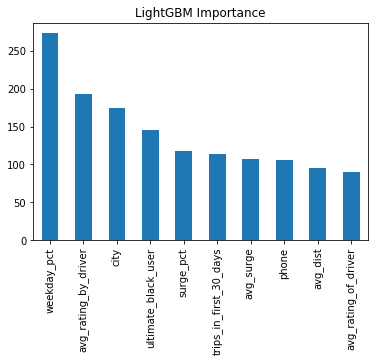

In [62]:
pd.Series(lgb_model.feature_importance(), X_train.columns ).sort_values(ascending=False).plot(kind='bar', title='LightGBM Importance');

Base model with default parameters gave an accuracy of 80% with an unbalanced target variable. The recall and precision improved once the target variable was balanced but the accuracy only improved by 1%.The first model that the GridSearchCV was performed on has 79% accuracy due to a considerable amount of false positives. By decreasing the threshold from .5 to .47 in the base model, fasle positives and false negatives evened out and both precision and recall gained 5 points. I chose to use LightGBM Classification in order to deal with the two categorical features and to speed up training on this data set. From the data some insights can be made. First, it seems like the users of Ultimate are using it for work and work related purposes; this can be deduced by seeing the majority of users are active during the busy times during the week. Also, there are not many Android users when it comes to Ultimate. This can be a software issue therefore, phone type in relation to the city population should be examined to determine whether or not there is perhaps software issues. Because only 40% of users have remained actove in the last 30 days, I would suggest some incentives to retain users such as coupons. 


In [63]:
# hypertuning parameters to be used, arr indicates tuned parameters
params = {'objective' : ['binary'],
         }
          
lgbm = lgb.LGBMClassifier( 
          objective = params['objective'], 
          n_jobs = -1, 
          random_state = 13              
                        )               

lgb_model = lgb.train(params, train_set = d_train)

# predictions made on cv 
lgb_y_pred = lgb_model.predict(X_test)
lgb_y_pred

array([0.90175514, 0.19025137, 0.89065889, ..., 0.03545046, 0.04563842,
       0.90346947])

In [64]:
#convert into binary values using threshold calculated above 
def to_binary(arr):
    """Converts probability given by model to a 1 or 0 based on a predetermined threshold"""
    new = []
    for i in range(len(arr)):
        if arr[i] >= 0.47:  
            new.append(1)
        else:
            new.append(0)
    return new

In [65]:
# results of the binary classification used for evaluation
results = to_binary(lgb_y_pred)

In [66]:
# first run base model with balanced class weight
confusion_matrix(y_test, results)

array([[3946,  929],
       [ 964, 3925]], dtype=int64)

In [67]:
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4875
           1       0.81      0.80      0.81      4889

    accuracy                           0.81      9764
   macro avg       0.81      0.81      0.81      9764
weighted avg       0.81      0.81      0.81      9764



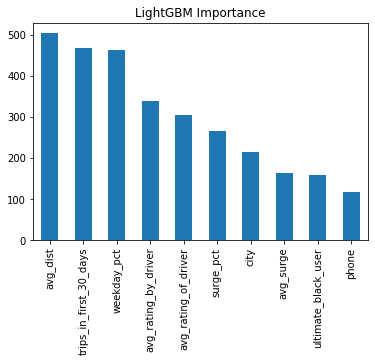

In [68]:
pd.Series(lgb_model.feature_importance(), X_train.columns ).sort_values(ascending=False).plot(kind='bar', title='LightGBM Importance');